In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import sqlite3
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# Connect sqlite3 to the database and fetch all tables

con = sqlite3.connect(r'zippedData\im.db\im.db')

cur = con.cursor()

cur.execute("SELECT name from sqlite_master").fetchall()

[('movie_basics',),
 ('directors',),
 ('known_for',),
 ('movie_akas',),
 ('movie_ratings',),
 ('persons',),
 ('principals',),
 ('writers',)]

In [4]:
# select relevant columns from the tables and join them together 

#directors has person_id,movie_id
#writers has movie_id,person_id
#known_for has person_id,movie_id
#movie_ratings movie_id,averagerating,numvotes
#persons has person_id,primary_name,birth_year,death_year,primary_profession
#principals has movie_id,person_id,category,job,characters
#movie_akas has movie_id,ordering,title,region,language,types,attributes,is_original_title
#movie_basics has movie_id,primary_title,original_title,start_year,runtime_minutes,genres

#persons,principals,movie_akas,movie_basics,movie_ratings are the only tables we need for all the columns in the db

combined = """SELECT *
                from principals
                JOIN movie_akas USING (movie_id)
                JOIN movie_basics USING (movie_id)
                JOIN movie_ratings USING (movie_id)
                JOIN persons USING (person_id);"""

combined_df = pd.read_sql_query(combined,con)
combined_df.head()



,movie_id,ordering,person_id,category,job,characters,ordering,title,region,language,...,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,primary_name,birth_year,death_year,primary_profession
0,tt0323808,10,nm0059247,editor,None,None,1,May Day,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
1,tt0323808,10,nm0059247,editor,None,None,2,Cowboys for Christ,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
2,tt0323808,10,nm0059247,editor,None,None,3,The Wicker Tree,GB,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
3,tt0323808,10,nm0059247,editor,None,None,4,The Wicker Tree,None,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"
4,tt0323808,10,nm0059247,editor,None,None,5,Плетеное дерево,RU,None,...,The Wicker Tree,2011,96.0,"Drama,Horror",3.9,2328,Sean Barton,1944.0,NaN,"editor,editorial_department,assistant_director"


In [5]:
# create a copy of the dataframe

imdb_df = combined_df.copy()
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2422866 entries, 0 to 2422865
Data columns (total 24 columns):
 #   Column              Dtype  
---  ------              -----  
 0   movie_id            object 
 1   ordering            int64  
 2   person_id           object 
 3   category            object 
 4   job                 object 
 5   characters          object 
 6   ordering            int64  
 7   title               object 
 8   region              object 
 9   language            object 
 10  types               object 
 11  attributes          object 
 12  is_original_title   float64
 13  primary_title       object 
 14  original_title      object 
 15  start_year          int64  
 16  runtime_minutes     float64
 17  genres              object 
 18  averagerating       float64
 19  numvotes            int64  
 20  primary_name        object 
 21  birth_year          float64
 22  death_year          float64
 23  primary_profession  object 
dtypes: float64(5), int64(4),

In [6]:
#check for the columns with missing values
imdb_df.isna().any()[imdb_df.isna().any() == True]

job                   True
characters            True
region                True
language              True
types                 True
attributes            True
runtime_minutes       True
genres                True
birth_year            True
death_year            True
primary_profession    True
dtype: bool

In [7]:
# check for the percentage null values
imdb_df.isna().mean()[imdb_df.isna().mean() > 0].sort_values(ascending=False)

death_year            0.982493
attributes            0.949760
language              0.855840
job                   0.725228
characters            0.606105
birth_year            0.564602
types                 0.402041
region                0.162510
runtime_minutes       0.039211
primary_profession    0.021650
genres                0.003738
dtype: float64

In [ ]:
# drop the columns with 40%+ null values
imdb_df.drop(labels=['death_year','attributes','language','job','characters','birth_year','types'],axis=1,inplace=True)

# check columns with null values.
imdb_df.isna().mean()[imdb_df.isna().mean() > 0].sort_values(ascending=False)

region                0.162510
runtime_minutes       0.039211
primary_profession    0.021650
genres                0.003738
dtype: float64

In [10]:
columns_with_null_values = imdb_df.isna().mean()[imdb_df.isna().mean() > 0].index.tolist()
columns_with_null_values

['region', 'runtime_minutes', 'genres', 'primary_profession']

In [11]:
#I will drop all the rows with null values since they are only a small percentage of the dataset.
imdb_df.dropna(axis=0,subset=columns_with_null_values,inplace=True)
#checking columns with null values.
imdb_df.isna().mean()[imdb_df.isna().mean() > 0].sort_values(ascending=False)

Series([], dtype: float64)

In [12]:
# check for the info of the dataframe
imdb_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1909588 entries, 0 to 2422865
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   movie_id            object 
 1   ordering            int64  
 2   person_id           object 
 3   category            object 
 4   ordering            int64  
 5   title               object 
 6   region              object 
 7   is_original_title   float64
 8   primary_title       object 
 9   original_title      object 
 10  start_year          int64  
 11  runtime_minutes     float64
 12  genres              object 
 13  averagerating       float64
 14  numvotes            int64  
 15  primary_name        object 
 16  primary_profession  object 
dtypes: float64(3), int64(4), object(10)
memory usage: 262.2+ MB


In [13]:
# recheck and confirm if any rows have null values
imdb_df.isna().any()[imdb_df.isna().any() == True]

Series([], dtype: bool)

In [15]:
# check if there are any duplicates

imdb_duplicates = imdb_df[imdb_df.duplicated()] #.index.to_list()
imdb_duplicates.size
#the size of the dataframe with duplicated values is 0 meaning there are no duplicates in our dataset

0

### **Rotten Tomatoes Data**

##### Steps to follow using the data

##### 1. Import the rotten tomatoes movie info dataframe and rotten tomatoes movie reviews dataframe.

##### 2. Check for null value percentage in the columns.

##### 3. Remove columns with more than 40% missing data.

##### 4. Remove null value rows in the remaining column.

##### 5. Check for and remove duplicated rows.

##### 6. Merge the two datasets.

##### 7. If possible try find a method of getting the movie names
##### This might involve downloading another dataset and getting movie names from there. Or finding a common column to the imdb or the numbers dataset (maybe release date or budget or income or review.)

In [16]:
# Load the rotten tomatoes movie info into the dataframe

rt_movie_info = pd.read_csv(r'zippedData/rt.movie_info.tsv/rt.movie_info.tsv',sep='\t')

rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [17]:
# convert the date from string to datetime
rt_movie_info['formatted_date'] = pd.to_datetime(rt_movie_info['theater_date'])
rt_movie_info.head()

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio,formatted_date
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN,1971-10-09
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One,2012-08-17
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN,1996-09-13
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN,1994-12-09
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN,NaT


In [18]:
# check the info of the dataframe
rt_movie_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1560 entries, 0 to 1559
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              1560 non-null   int64         
 1   synopsis        1498 non-null   object        
 2   rating          1557 non-null   object        
 3   genre           1552 non-null   object        
 4   director        1361 non-null   object        
 5   writer          1111 non-null   object        
 6   theater_date    1201 non-null   object        
 7   dvd_date        1201 non-null   object        
 8   currency        340 non-null    object        
 9   box_office      340 non-null    object        
 10  runtime         1530 non-null   object        
 11  studio          494 non-null    object        
 12  formatted_date  1201 non-null   datetime64[ns]
dtypes: datetime64[ns](1), int64(1), object(11)
memory usage: 158.6+ KB


In [19]:
# check if there are missing values

rt_movie_info.isna().any()

id                False
synopsis           True
rating             True
genre              True
director           True
writer             True
theater_date       True
dvd_date           True
currency           True
box_office         True
runtime            True
studio             True
formatted_date     True
dtype: bool

In [20]:
# groupby genre and check for the descriptive statistics

rt_movie_info.groupby('genre').describe()

id                       \
                                                   count         mean     min   
genre                                                                           
Action and Adventure                                19.0  1016.842105    70.0   
Action and Adventure|Animation|Art House and In...   1.0   135.000000   135.0   
Action and Adventure|Animation|Classics|Comedy|...   1.0  1156.000000  1156.0   
Action and Adventure|Animation|Comedy                1.0   564.000000   564.0   
Action and Adventure|Animation|Comedy|Drama|Kid...   1.0  1418.000000  1418.0   
...                                                  ...          ...     ...   
Science Fiction and Fantasy                          6.0  1339.333333   835.0   
Science Fiction and Fantasy|Romance                  1.0  1908.000000  1908.0   
Special Interest                                     1.0   636.000000   636.0   
Special Interest|Sports and Fitness                  1.0   265.000000   265.0   
Western                                              5.0  1260.000000   732.0   

                                                                             \
                                                        25%     50%     75%   
genre                                                                         
Action and Adventure                                 481.00   774.0  1593.5   
Action and Adventure|Animation|Art House and In...   135.00   135.0   135.0   
Action and Adventure|Animation|Classics|Comedy|...  1156.00  1156.0  1156.0   
Action and Adventure|Animation|Comedy                564.00   564.0   564.0   
Action and Adventure|Animation|Comedy|Drama|Kid...  1418.00  1418.0  1418.0   
...                                                     ...     ...     ...   
Science Fiction and Fantasy                         1138.25  1402.5  1615.0   
Science Fiction and Fantasy|Romance                 1908.00  1908.0  1908.0   
Special Interest                                     636.00   636.0   636.0   
Special Interest|Sports and Fitness                  265.00   265.0   265.0   
Western                                              880.00  1468.0  1493.0   

                                                                        \
                                                       max         std   
genre                                                                    
Action and Adventure                                1913.0  595.676484   
Action and Adventure|Animation|Art House and In...   135.0         NaN   
Action and Adventure|Animation|Classics|Comedy|...  1156.0         NaN   
Action and Adventure|Animation|Comedy                564.0         NaN   
Action and Adventure|Animation|Comedy|Drama|Kid...  1418.0         NaN   
...                                                    ...         ...   
Science Fiction and Fantasy                         1660.0  331.349765   
Science Fiction and Fantasy|Romance                 1908.0         NaN   
Special Interest                                     636.0         NaN   
Special Interest|Sports and Fitness                  265.0         NaN   
Western                                             1727.0  429.774941   

                                                   formatted_date  \
                                                            count   
genre                                                               
Action and Adventure                                            9   
Action and Adventure|Animation|Art House and In...              1   
Action and Adventure|Animation|Classics|Comedy|...              1   
Action and Adventure|Animation|Comedy                           1   
Action and Adventure|Animation|Comedy|Drama|Kid...              1   
...                                                           ...   
Science Fiction and Fantasy                                     4   
Science Fiction and Fantasy|Romance                             0   
Special Interest

In [21]:
# Load the rotten tomatoes reviews dataset 

rt_reviews = pd.read_csv(r'zippedData\rt.reviews.tsv\rt.reviews.tsv',sep='\t',encoding='unicode_escape') #,on_bad_lines='skip'

rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"


In [ ]:
# convert the date type from dtring to datetime
rt_reviews['formatted_date'] = pd.to_datetime(rt_reviews['date'])
rt_reviews.head()

,id,review,rating,fresh,critic,top_critic,publisher,date,formatted_date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018",2018-11-10
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018",2018-05-23
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018",2018-01-04
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017",2017-11-16
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017",2017-10-12


In [22]:
# filter by id to find rows where id is equal to three

rt_reviews[rt_reviews['id'] == 3]

,id,review,rating,fresh,critic,top_critic,publisher,date
0,3,A distinctly gallows take on contemporary fina...,3/5,fresh,PJ Nabarro,0,Patrick Nabarro,"November 10, 2018"
1,3,It's an allegory in search of a meaning that n...,NaN,rotten,Annalee Newitz,0,io9.com,"May 23, 2018"
2,3,... life lived in a bubble in financial dealin...,NaN,fresh,Sean Axmaker,0,Stream on Demand,"January 4, 2018"
3,3,Continuing along a line introduced in last yea...,NaN,fresh,Daniel Kasman,0,MUBI,"November 16, 2017"
4,3,... a perverse twist on neorealism...,NaN,fresh,NaN,0,Cinema Scope,"October 12, 2017"
...,...,...,...,...,...,...,...,...
158,3,Beyond its withering critique of contemporary ...,NaN,fresh,David Jenkins,0,Little White Lies,"May 25, 2012"
159,3,"Threatens to soar and to be important, but it ...",3/5,fresh,Dave Calhoun,1,Time Out,"May 25, 2012"
160,3,A parade of hollow didactic encounters.,NaN,rotten,Owen Gleiberman,1,Entertainment Weekly,"May 25, 2012"
161,3,[An] agonisingly self-conscious and meagre pie...,2/5,rotten,Peter Bradshaw,0,Guardian,"May 25, 2012"


In [23]:
# check for columns of the dataframe
rt_reviews.columns

Index(['id', 'review', 'rating', 'fresh', 'critic', 'top_critic', 'publisher',
       'date'],
      dtype='object')

In [24]:
# create a uniform format of rating(float)

rt_reviews['rating'].value_counts()
#rt_reviews['rating']


# convert the values to one format(float)
# First convert the values to a string
rt_reviews['rating'] = rt_reviews['rating'].astype(str)
# Remove spaces
rt_reviews['rating'] = rt_reviews['rating'].str.replace(' ', '', regex=False)

# Handle fractions only while still string
fractions = rt_reviews['rating'].str.contains('/', na=False)
rt_reviews.loc[fractions, 'rating'] = (
    rt_reviews.loc[fractions, 'rating']
      .str.split('/')
      .apply(lambda x: float(x[0]) / float(x[1]))
)

# Now finally convert to float (numeric)
rt_reviews['rating'] = pd.to_numeric(rt_reviews['rating'], errors='coerce')

# check the value counts
rt_reviews['rating'].value_counts()

rating
0.60     4813
0.80     4188
0.50     4079
0.75     3664
0.40     3425
         ... 
5.20        1
4.90        1
7.70        1
0.05        1
15.50       1
Name: count, Length: 116, dtype: int64

In [ ]:
# check for the info of the dataframe
rt_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 54432 entries, 0 to 54431
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              54432 non-null  int64         
 1   review          48869 non-null  object        
 2   rating          34446 non-null  float64       
 3   fresh           54432 non-null  object        
 4   critic          51710 non-null  object        
 5   top_critic      54432 non-null  int64         
 6   publisher       54123 non-null  object        
 7   date            54432 non-null  object        
 8   formatted_date  54432 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(1), int64(2), object(5)
memory usage: 3.7+ MB


In [25]:
# check for missing values in the dataframe
rt_reviews.isna().any()

id            False
review         True
rating         True
fresh         False
critic         True
top_critic    False
publisher      True
date          False
dtype: bool

In [26]:
#lets forget about rotten tomatoes for now
#lets look at the tn.movie_gross dataset, the tmdb dataset and the bom.movie_gross
#all these datasets have a movie name column.
#maybe we can combine them using this column. if successful we will be able to find the ratings,budget and income of the movies

In [27]:
# Load the tmdb dataset as a dataframe

tmdb_movies_df = pd.read_csv(r'zippedData\tmdb.movies.csv\tmdb.movies.csv')
tmdb_movies_df.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [28]:
# check for the info of the dataset
tmdb_movies_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26517 entries, 0 to 26516
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         26517 non-null  int64  
 1   genre_ids          26517 non-null  object 
 2   id                 26517 non-null  int64  
 3   original_language  26517 non-null  object 
 4   original_title     26517 non-null  object 
 5   popularity         26517 non-null  float64
 6   release_date       26517 non-null  object 
 7   title              26517 non-null  object 
 8   vote_average       26517 non-null  float64
 9   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(3), object(5)
memory usage: 2.0+ MB


In [29]:
# Load the tn.movie_budgets dataset as a dataframe

movie_budgets_df = pd.read_csv(r'zippedData\tn.movie_budgets.csv\tn.movie_budgets.csv') #,on_bad_lines='skip'

movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [30]:
# check for the info of the dataframe
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [31]:
# Load the bom.movie_gross dataset as a dataframe

movie_gross_df = pd.read_csv(r'zippedData\bom.movie_gross.csv\bom.movie_gross.csv')
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [32]:
# check the info of the dataframe
movie_budgets_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5782 entries, 0 to 5781
Data columns (total 6 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   id                 5782 non-null   int64 
 1   release_date       5782 non-null   object
 2   movie              5782 non-null   object
 3   production_budget  5782 non-null   object
 4   domestic_gross     5782 non-null   object
 5   worldwide_gross    5782 non-null   object
dtypes: int64(1), object(5)
memory usage: 271.2+ KB


In [33]:
#merge movies_gross_df with tmdb_movies_df as first merge

merge_df_1 = pd.merge(tmdb_movies_df,movie_gross_df,left_on='title',right_on='title')

merge_df_1.head()

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,studio,domestic_gross,foreign_gross,year
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010


In [34]:
# check the info of the first merge
merge_df_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2703 entries, 0 to 2702
Data columns (total 14 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         2703 non-null   int64  
 1   genre_ids          2703 non-null   object 
 2   id                 2703 non-null   int64  
 3   original_language  2703 non-null   object 
 4   original_title     2703 non-null   object 
 5   popularity         2703 non-null   float64
 6   release_date       2703 non-null   object 
 7   title              2703 non-null   object 
 8   vote_average       2703 non-null   float64
 9   vote_count         2703 non-null   int64  
 10  studio             2702 non-null   object 
 11  domestic_gross     2682 non-null   float64
 12  foreign_gross      1723 non-null   object 
 13  year               2703 non-null   int64  
dtypes: float64(3), int64(4), object(7)
memory usage: 295.8+ KB


In [35]:
# merge the combination df with bom_movie_budgets as second merge

merge_df_2 = pd.merge(merge_df_1,movie_budgets_df,left_on='title',right_on='movie')

merge_df_2.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,studio,domestic_gross_x,foreign_gross,year,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010,30,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010,50,"Jul 9, 2010",Despicable Me,"$69,000,000","$251,513,985","$543,464,573"


In [36]:
# check the info of the second merge
merge_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1395 non-null   int64  
 1   genre_ids          1395 non-null   object 
 2   id_x               1395 non-null   int64  
 3   original_language  1395 non-null   object 
 4   original_title     1395 non-null   object 
 5   popularity         1395 non-null   float64
 6   release_date_x     1395 non-null   object 
 7   title              1395 non-null   object 
 8   vote_average       1395 non-null   float64
 9   vote_count         1395 non-null   int64  
 10  studio             1394 non-null   object 
 11  domestic_gross_x   1393 non-null   float64
 12  foreign_gross      1200 non-null   object 
 13  year               1395 non-null   int64  
 14  id_y               1395 non-null   int64  
 15  release_date_y     1395 non-null   object 
 16  movie              1395 

In [37]:
#lets see how many rows we would have if we only merged gross and budget
merge_df_1b = pd.merge(movie_gross_df,movie_budgets_df,left_on='title',right_on='movie')

merge_df_1b.head()


,title,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,Toy Story 3,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
1,Inception,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
2,Shrek Forever After,P/DW,238700000.0,513900000,2010,27,"May 21, 2010",Shrek Forever After,"$165,000,000","$238,736,787","$756,244,673"
3,The Twilight Saga: Eclipse,Sum.,300500000.0,398000000,2010,53,"Jun 30, 2010",The Twilight Saga: Eclipse,"$68,000,000","$300,531,751","$706,102,828"
4,Iron Man 2,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"


In [38]:
#we have fewer records if we merge gross and budgets without tmdb
merge_df_1b.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1247 entries, 0 to 1246
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   title              1247 non-null   object 
 1   studio             1246 non-null   object 
 2   domestic_gross_x   1245 non-null   float64
 3   foreign_gross      1086 non-null   object 
 4   year               1247 non-null   int64  
 5   id                 1247 non-null   int64  
 6   release_date       1247 non-null   object 
 7   movie              1247 non-null   object 
 8   production_budget  1247 non-null   object 
 9   domestic_gross_y   1247 non-null   object 
 10  worldwide_gross    1247 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 107.3+ KB


In [39]:
# checking for columns of the second merge
merge_df_2.columns

Index(['Unnamed: 0', 'genre_ids', 'id_x', 'original_language',
       'original_title', 'popularity', 'release_date_x', 'title',
       'vote_average', 'vote_count', 'studio', 'domestic_gross_x',
       'foreign_gross', 'year', 'id_y', 'release_date_y', 'movie',
       'production_budget', 'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

In [78]:
merge_df_2.head()

,Unnamed: 0,genre_ids,id_x,original_language,original_title,popularity,release_date_x,title,vote_average,vote_count,studio,domestic_gross_x,foreign_gross,year,id_y,release_date_y,movie,production_budget,domestic_gross_y,worldwide_gross
0,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610,P/DW,217600000.0,277300000,2010,30,"Mar 26, 2010",How to Train Your Dragon,"$165,000,000","$217,581,232","$494,870,992"
1,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368,Par.,312400000.0,311500000,2010,15,"May 7, 2010",Iron Man 2,"$170,000,000","$312,433,331","$621,156,389"
2,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186,WB,292600000.0,535700000,2010,38,"Jul 16, 2010",Inception,"$160,000,000","$292,576,195","$835,524,642"
3,7,"[16, 10751, 35]",10193,en,Toy Story 3,24.445,2010-06-17,Toy Story 3,7.7,8340,BV,415000000.0,652000000,2010,47,"Jun 18, 2010",Toy Story 3,"$200,000,000","$415,004,880","$1,068,879,522"
4,8,"[16, 10751, 35]",20352,en,Despicable Me,23.673,2010-07-09,Despicable Me,7.2,10057,Uni.,251500000.0,291600000,2010,50,"Jul 9, 2010",Despicable Me,"$69,000,000","$251,513,985","$543,464,573"


In [40]:
# checking for info of the second merge
merge_df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1395 entries, 0 to 1394
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Unnamed: 0         1395 non-null   int64  
 1   genre_ids          1395 non-null   object 
 2   id_x               1395 non-null   int64  
 3   original_language  1395 non-null   object 
 4   original_title     1395 non-null   object 
 5   popularity         1395 non-null   float64
 6   release_date_x     1395 non-null   object 
 7   title              1395 non-null   object 
 8   vote_average       1395 non-null   float64
 9   vote_count         1395 non-null   int64  
 10  studio             1394 non-null   object 
 11  domestic_gross_x   1393 non-null   float64
 12  foreign_gross      1200 non-null   object 
 13  year               1395 non-null   int64  
 14  id_y               1395 non-null   int64  
 15  release_date_y     1395 non-null   object 
 16  movie              1395 

In [41]:
# checking for perecentage of missing values of the second merge
missing_percent_per_column =merge_df_2.isnull().mean() * 100
missing_percent_per_column

Unnamed: 0            0.000000
genre_ids             0.000000
id_x                  0.000000
original_language     0.000000
original_title        0.000000
popularity            0.000000
release_date_x        0.000000
title                 0.000000
vote_average          0.000000
vote_count            0.000000
studio                0.071685
domestic_gross_x      0.143369
foreign_gross        13.978495
year                  0.000000
id_y                  0.000000
release_date_y        0.000000
movie                 0.000000
production_budget     0.000000
domestic_gross_y      0.000000
worldwide_gross       0.000000
dtype: float64

I will investigate the properties of merge_df_2 by plotting: 

1. genres vs popularity

2. popularity vs profits

3. Genres vs Profits

4. Rating vs profits

5. Language vs popularity










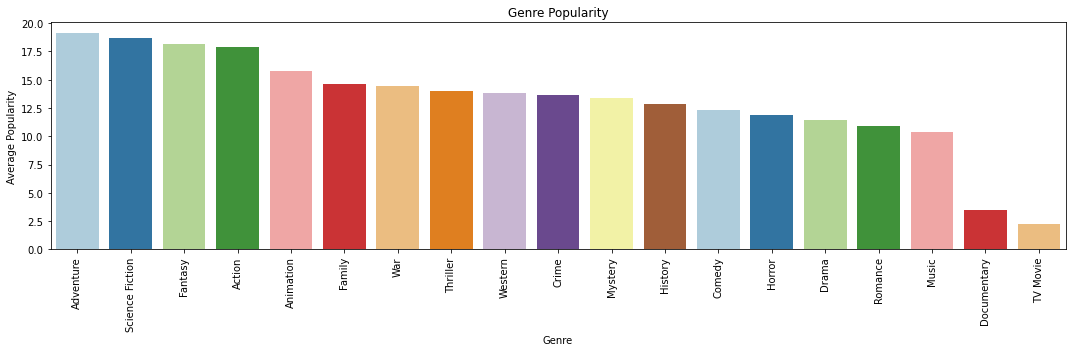

In [159]:
# Bar graph of genre against popularity


# Genre ID to Name Mapping
genre_dict = {
    28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy',
    80: 'Crime', 99: 'Documentary', 18: 'Drama', 10751: 'Family',
    14: 'Fantasy', 36: 'History', 27: 'Horror', 10402: 'Music',
    9648: 'Mystery', 10749: 'Romance', 878: 'Science Fiction',
    10770: 'TV Movie', 53: 'Thriller', 10752: 'War', 37: 'Western'
}

# Explode genre_ids, map genre names
df = merge_df_2.explode('genre_ids')
df['genre_name'] = df['genre_ids'].map(genre_dict)

# Drop missing and duplicate genres
df = df.dropna(subset=['genre_name'])

# Group by genre_name and calculate average popularity
grouped_df = df.groupby('genre_name', as_index=False)['popularity'].mean().sort_values(by='popularity', ascending=False)

# Plot genre popularity
plt.figure(figsize=(15, 5))
sns.barplot(data=grouped_df, x='genre_name', y='popularity', palette= 'Paired')
plt.xticks(rotation=90)
plt.title('Genre Popularity')
plt.xlabel('Genre')
plt.ylabel('Average Popularity')
plt.tight_layout()
plt.show()

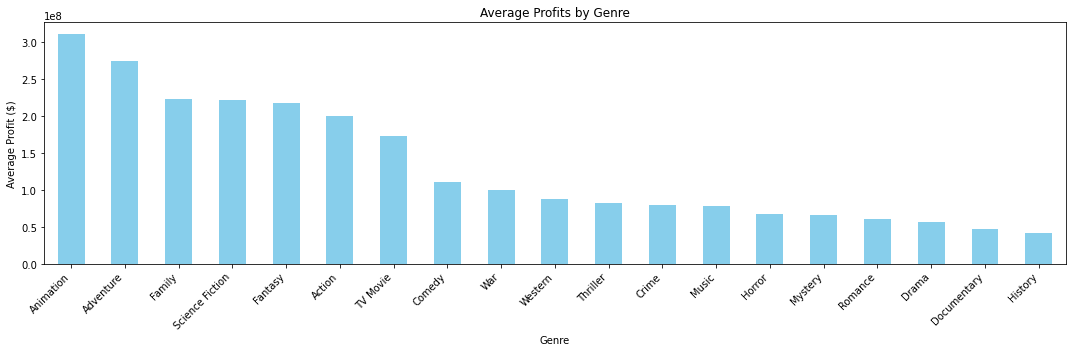

In [238]:
# Plotting average profits by genres

# Create a profits column
merge_df_2['worldwide_gross'] = merge_df_2['worldwide_gross'].astype(str).str.replace('$', '', regex=False).str.replace(',', '',regex=False).astype(float)
merge_df_2['production_budget'] = merge_df_2['production_budget'].astype(str).str.replace('$', '', regex=False).str.replace(',', '',regex=False).astype(float)
merge_df_2['profits'] = merge_df_2['worldwide_gross'] - merge_df_2['production_budget']


# Ensure genre_ids are strings, clean, and split into lists
merge_df_2['genre_ids'] = merge_df_2['genre_ids'].apply(
    lambda x: str(x).strip('[]').split(', ') if isinstance(x, (list, str)) else []
)

# Convert genre IDs to integers and map them to genre names
merge_df_2['genre_ids'] = merge_df_2['genre_ids'].apply(
    lambda x: [int(i) for i in x if i.isdigit()] if isinstance(x, list) else []
)
merge_df_2['genre_names'] = merge_df_2['genre_ids'].apply(
    lambda ids: [genre_dict.get(genre_id, 'Unknown') for genre_id in ids]
)

# Explode genres, drop missing values
merged_df_exploded = merge_df_2.explode('genre_names').dropna(subset=['genre_names', 'profits'])

# Group by genre_names and calculate average profits
avg_profits = merged_df_exploded.groupby('genre_names')['profits'].mean().sort_values(ascending=False)

# Plot
plt.figure(figsize=(15,5))
avg_profits.plot(kind='bar', color='skyblue')
plt.title('Average Profits by Genre')
plt.xlabel('Genre')
plt.ylabel('Average Profit ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




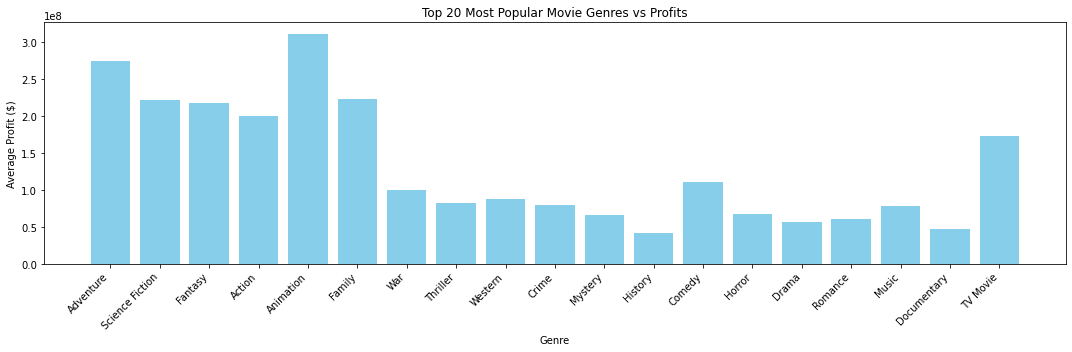

In [144]:
# Bar graph of Top 20 most popular movie genres by their profits

# Data preparation and cleaning
merge_df_2['genre_ids'] = merge_df_2['genre_ids'].apply(lambda x: str(x) if isinstance(x, (list, str)) else "")
merge_df_2['genre_ids'] = merge_df_2['genre_ids'].str.strip('[]').str.split(', ')
merge_df_2['genre_ids'] = merge_df_2['genre_ids'].apply(lambda x: [int(i) for i in x if i.isdigit()] if isinstance(x, list) else [])
merge_df_2['genre_names'] = merge_df_2['genre_ids'].apply(lambda ids: [genre_dict.get(genre_id, 'Unknown') for genre_id in ids])

# Explode genre_names to create individual rows per genre
merged_df_exploded = merge_df_2.explode('genre_names')

# Group data by genre_names and popularity, calculate average profits
grouped_df = merged_df_exploded.groupby(['genre_names'])[['popularity', 'profits']].mean().reset_index()

# Sort by popularity and select the top 5 genres
top_genres = grouped_df.sort_values(by='popularity', ascending= False).head(20)

# Plot profits for the top 5 most popular genres
plt.figure(figsize=(15,5))
plt.bar(top_genres['genre_names'], top_genres['profits'], color='skyblue')

plt.title('Top 20 Most Popular Movie Genres vs Profits')
plt.xlabel('Genre')
plt.ylabel('Average Profit ($)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()




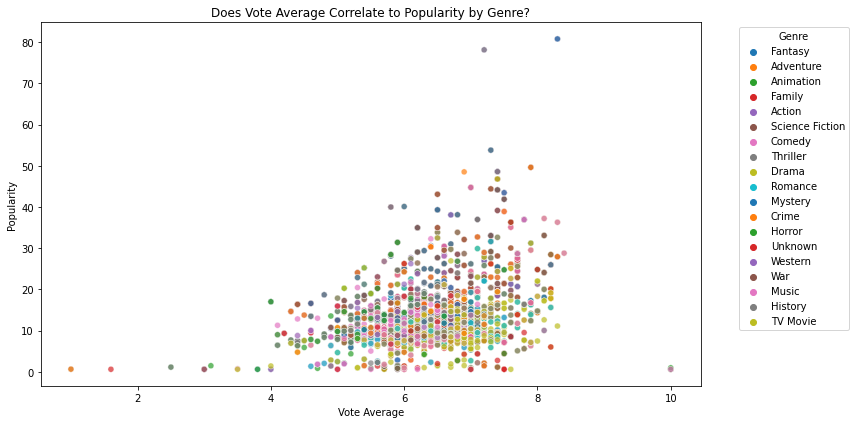

In [264]:

# Example genre mapping dictionary
genre_dict = {
    28: 'Action', 12: 'Adventure', 16: 'Animation', 35: 'Comedy',
    80: 'Crime', 18: 'Drama', 10751: 'Family', 14: 'Fantasy',
    36: 'History', 27: 'Horror', 10402: 'Music', 9648: 'Mystery',
    10749: 'Romance', 878: 'Science Fiction', 10770: 'TV Movie',
    53: 'Thriller', 10752: 'War', 37: 'Western'
}

# Cleaning and preparing the genre names
merge_df_2['genre_ids'] = merge_df_2['genre_ids'].apply(
    lambda x: [int(i) for i in str(x).strip('[]').split(', ') if i.isdigit()] if isinstance(x, (list, str)) else []
)
merge_df_2['genre_names'] = merge_df_2['genre_ids'].apply(
    lambda ids: [genre_dict.get(genre_id, 'Unknown') for genre_id in ids]
)

# Explode genres for independent rows
df = merge_df_2.explode('genre_names').dropna(subset=['genre_names', 'popularity', 'vote_average'])

# Plot: vote_average vs popularity grouped by genres
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df, x='vote_average', y='popularity', hue='genre_names', palette='tab10', alpha = 0.7)

plt.title('Does Vote Average Correlate to Popularity by Genre?')
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.legend(title='Genre', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [42]:
# perfoming the third merge

imdb_gross_combine = pd.merge(imdb_df,movie_gross_df,on='title')
imdb_gross_combine

,movie_id,ordering,person_id,category,ordering,title,region,is_original_title,primary_title,original_title,...,runtime_minutes,genres,averagerating,numvotes,primary_name,primary_profession,studio,domestic_gross,foreign_gross,year
0,tt0475290,10,nm0005683,cinematographer,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,106.0,"Comedy,Drama,Music",6.3,111422,Roger Deakins,"cinematographer,camera_department,miscellaneous",Uni.,30500000.0,33100000,2016
1,tt0475290,1,nm0000982,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,106.0,"Comedy,Drama,Music",6.3,111422,Josh Brolin,"actor,producer,writer",Uni.,30500000.0,33100000,2016
2,tt0475290,2,nm0000123,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,106.0,"Comedy,Drama,Music",6.3,111422,George Clooney,"actor,producer,director",Uni.,30500000.0,33100000,2016
3,tt0475290,3,nm2403277,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,106.0,"Comedy,Drama,Music",6.3,111422,Alden Ehrenreich,"actor,soundtrack",Uni.,30500000.0,33100000,2016
4,tt0475290,4,nm0000146,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,106.0,"Comedy,Drama,Music",6.3,111422,Ralph Fiennes,"actor,director,soundtrack",Uni.,30500000.0,33100000,2016
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80965,tt8119752,5,nm2891286,director,9,Gonjiam: Haunted Asylum,XWW,0.0,Gonjiam: Haunted Asylum,Gon-ji-am,...,95.0,"Horror,Mystery",6.1,2585,Beom-sik Jeong,"director,writer",WGUSA,115000.0,NaN,2018
80966,tt8119752,6,nm9687793,writer,9,Gonjiam: Haunted Asylum,XWW,0.0,Gonjiam: Haunted Asylum,Gon-ji-am,...,95.0,"Horror,Mystery",6.1,2585,Sang-min Park,writer,WGUSA,115000.0,NaN,2018
80967,tt8119752,7,nm3774009,producer,9,Gonjiam: Haunted Asylum,XWW,0.0,Gonjiam: Haunted Asylum,Gon-ji-am,...,95.0,"Horror,Mystery",6.1,2585,Won-guk Kim,producer,WGUSA,115000.0,NaN,2018
80968,tt8119752,8,nm10106374,cinematographer,9,Gonjiam: Haunted Asylum,XWW,0.0,Gonjiam: Haunted Asylum,Gon-ji-am,...,95.0,"Horror,Mystery",6.1,2585,Yoon Byung-Ho,"cinematographer,camera_department",WGUSA,115000.0,NaN,2018


In [43]:
# checking for info of the third merge
imdb_gross_combine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 80970 entries, 0 to 80969
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            80970 non-null  object 
 1   ordering            80970 non-null  int64  
 2   person_id           80970 non-null  object 
 3   category            80970 non-null  object 
 4   ordering            80970 non-null  int64  
 5   title               80970 non-null  object 
 6   region              80970 non-null  object 
 7   is_original_title   80970 non-null  float64
 8   primary_title       80970 non-null  object 
 9   original_title      80970 non-null  object 
 10  start_year          80970 non-null  int64  
 11  runtime_minutes     80970 non-null  float64
 12  genres              80970 non-null  object 
 13  averagerating       80970 non-null  float64
 14  numvotes            80970 non-null  int64  
 15  primary_name        80970 non-null  object 
 16  prim

In [44]:
# perfoming fourth merge
final_combined = pd.merge(imdb_gross_combine,movie_budgets_df,left_on='title',right_on='movie')
final_combined.head()

,movie_id,ordering,person_id,category,ordering,title,region,is_original_title,primary_title,original_title,...,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0475290,10,nm0005683,cinematographer,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
1,tt0475290,1,nm0000982,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
2,tt0475290,2,nm0000123,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
3,tt0475290,3,nm2403277,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
4,tt0475290,4,nm0000146,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"


In [45]:
# info of the fourth merge
final_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45869 entries, 0 to 45868
Data columns (total 27 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            45869 non-null  object 
 1   ordering            45869 non-null  int64  
 2   person_id           45869 non-null  object 
 3   category            45869 non-null  object 
 4   ordering            45869 non-null  int64  
 5   title               45869 non-null  object 
 6   region              45869 non-null  object 
 7   is_original_title   45869 non-null  float64
 8   primary_title       45869 non-null  object 
 9   original_title      45869 non-null  object 
 10  start_year          45869 non-null  int64  
 11  runtime_minutes     45869 non-null  float64
 12  genres              45869 non-null  object 
 13  averagerating       45869 non-null  float64
 14  numvotes            45869 non-null  int64  
 15  primary_name        45869 non-null  object 
 16  prim

In [46]:
# checking for columns of the fourth merge
final_combined.columns

Index(['movie_id', 'ordering', 'person_id', 'category', 'ordering', 'title',
       'region', 'is_original_title', 'primary_title', 'original_title',
       'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes',
       'primary_name', 'primary_profession', 'studio', 'domestic_gross_x',
       'foreign_gross', 'year', 'id', 'release_date', 'movie',
       'production_budget', 'domestic_gross_y', 'worldwide_gross'],
      dtype='object')

In [47]:
final_combined.head()


,movie_id,ordering,person_id,category,ordering,title,region,is_original_title,primary_title,original_title,...,studio,domestic_gross_x,foreign_gross,year,id,release_date,movie,production_budget,domestic_gross_y,worldwide_gross
0,tt0475290,10,nm0005683,cinematographer,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
1,tt0475290,1,nm0000982,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
2,tt0475290,2,nm0000123,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
3,tt0475290,3,nm2403277,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"
4,tt0475290,4,nm0000146,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,Uni.,30500000.0,33100000,2016,22,"Feb 5, 2016","Hail, Caesar!","$22,000,000","$30,080,225","$64,160,680"


In [48]:
# perfoming the final merge
all_combined  = pd.merge(final_combined,tmdb_movies_df,on='title')
all_combined.head()

,movie_id,ordering,person_id,category,ordering,title,region,is_original_title,primary_title,original_title_x,...,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,vote_average,vote_count
0,tt0475290,10,nm0005683,cinematographer,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,"$64,160,680",17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
1,tt0475290,1,nm0000982,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,"$64,160,680",17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
2,tt0475290,2,nm0000123,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,"$64,160,680",17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
3,tt0475290,3,nm2403277,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,"$64,160,680",17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328
4,tt0475290,4,nm0000146,actor,24,"Hail, Caesar!",GB,0.0,"Hail, Caesar!","Hail, Caesar!",...,"$64,160,680",17497,"[35, 18, 9648]",270487,en,"Hail, Caesar!",12.312,2016-02-05,5.9,2328


In [49]:
# checking for the info of the final merge
all_combined.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58129 entries, 0 to 58128
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            58129 non-null  object 
 1   ordering            58129 non-null  int64  
 2   person_id           58129 non-null  object 
 3   category            58129 non-null  object 
 4   ordering            58129 non-null  int64  
 5   title               58129 non-null  object 
 6   region              58129 non-null  object 
 7   is_original_title   58129 non-null  float64
 8   primary_title       58129 non-null  object 
 9   original_title_x    58129 non-null  object 
 10  start_year          58129 non-null  int64  
 11  runtime_minutes     58129 non-null  float64
 12  genres              58129 non-null  object 
 13  averagerating       58129 non-null  float64
 14  numvotes            58129 non-null  int64  
 15  primary_name        58129 non-null  object 
 16  prim

In [50]:
# checking for duplicated values in te final merge
all_combined[all_combined.duplicated() == True]

,movie_id,ordering,person_id,category,ordering,title,region,is_original_title,primary_title,original_title_x,...,worldwide_gross,Unnamed: 0,genre_ids,id_y,original_language,original_title_y,popularity,release_date_y,vote_average,vote_count


In [185]:
missing_index = list(all_combined[all_combined.isna() == True ].index)

In [51]:
# checking for missing values in the final merge
all_combined.isna().sum()[all_combined.isna().sum() > 0]

domestic_gross_x      10
foreign_gross       7152
dtype: int64

In [52]:
# drop the rows since they contributre a small percentage of the total population
all_combined.isna().mean()[all_combined.isna().mean() > 0]

domestic_gross_x    0.000172
foreign_gross       0.123037
dtype: float64

In [53]:
# recheck the info of the final merge

all_combined.dropna(axis=0,subset=['domestic_gross_x','foreign_gross'],inplace=True)
all_combined.info()

<class 'pandas.core.frame.DataFrame'>
Index: 50967 entries, 0 to 58128
Data columns (total 36 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   movie_id            50967 non-null  object 
 1   ordering            50967 non-null  int64  
 2   person_id           50967 non-null  object 
 3   category            50967 non-null  object 
 4   ordering            50967 non-null  int64  
 5   title               50967 non-null  object 
 6   region              50967 non-null  object 
 7   is_original_title   50967 non-null  float64
 8   primary_title       50967 non-null  object 
 9   original_title_x    50967 non-null  object 
 10  start_year          50967 non-null  int64  
 11  runtime_minutes     50967 non-null  float64
 12  genres              50967 non-null  object 
 13  averagerating       50967 non-null  float64
 14  numvotes            50967 non-null  int64  
 15  primary_name        50967 non-null  object 
 16  primary_p

In [54]:
# confirmation no null values
all_combined.isna().mean()[all_combined.isna().mean() > 0]
#no na values shown by empty result

Series([], dtype: float64)

In [55]:
# checking for columns in the final merge
all_combined.columns

Index(['movie_id', 'ordering', 'person_id', 'category', 'ordering', 'title',
       'region', 'is_original_title', 'primary_title', 'original_title_x',
       'start_year', 'runtime_minutes', 'genres', 'averagerating', 'numvotes',
       'primary_name', 'primary_profession', 'studio', 'domestic_gross_x',
       'foreign_gross', 'year', 'id_x', 'release_date_x', 'movie',
       'production_budget', 'domestic_gross_y', 'worldwide_gross',
       'Unnamed: 0', 'genre_ids', 'id_y', 'original_language',
       'original_title_y', 'popularity', 'release_date_y', 'vote_average',
       'vote_count'],
      dtype='object')

# DATA VISUALIZATION

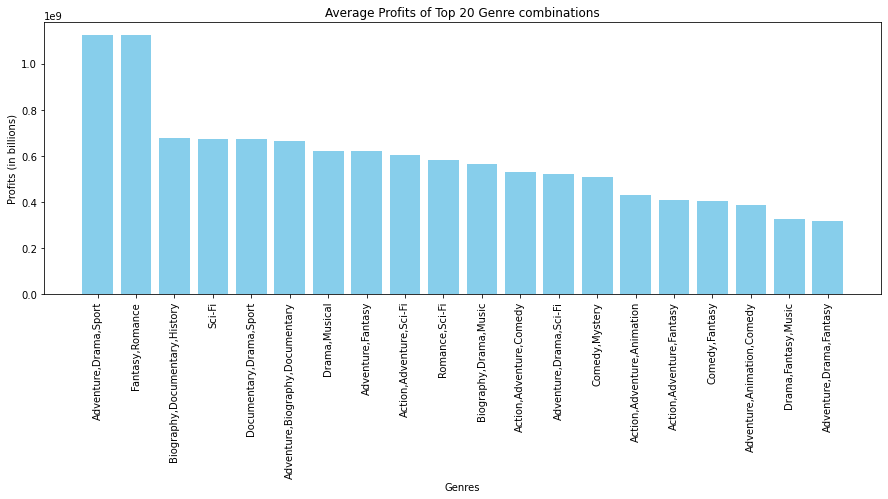

In [56]:
# Remove dollar signs ($) and commas (,) from 'worldwide_gross' and 'production_budget'
all_combined['worldwide_gross'] = all_combined['worldwide_gross'].str.replace(r'\$', '', regex=True).str.replace(',', '', regex=True).astype(float)
all_combined['production_budget'] = all_combined['production_budget'].str.replace(r'\$', '', regex=True).str.replace(',', '', regex=True).astype(float)


# Calculate profits
all_combined['profits'] = all_combined['worldwide_gross'] - all_combined['production_budget']


# Plot graph of top20 genre combinations against profits

result = all_combined.groupby('genres')['profits'].mean().sort_values(ascending=False).head(20)
fig,ax = plt.subplots(figsize = (15,5))
ax.bar(result.index, result.values, color = 'skyblue')
plt.title('Average Profits of Top 20 Genre combinations')
plt.xlabel('Genres')
plt.ylabel('Profits (in billions)')
plt.xticks(rotation=90);
plt.show()


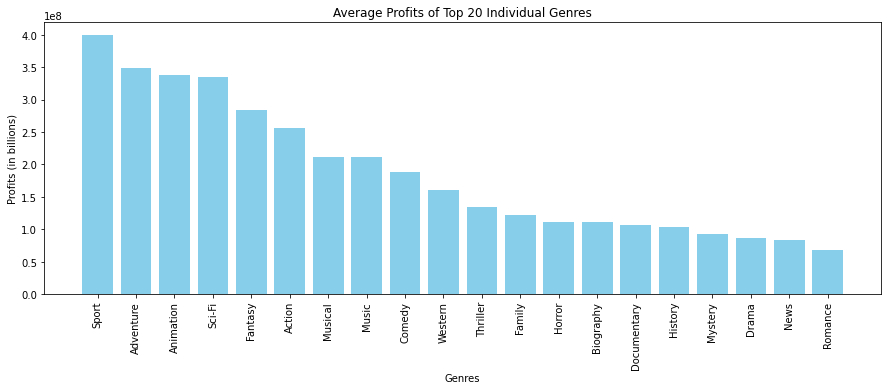

In [ ]:


# Ensure columns are unique
all_combined.columns = [f"{col}_{i}" if all_combined.columns.tolist().count(col) > 1 else col
                        for i, col in enumerate(all_combined.columns)]

# Process genres and calculate average profits
all_combined_exploded = all_combined.assign(genres=all_combined['genres'].str.split(',')).explode('genres')
result = all_combined_exploded.groupby('genres')['profits'].mean().sort_values(ascending=False).head(20)

# Plot the results
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(result.index, result.values, color='skyblue')
plt.title('Average Profits of Top 20 Individual Genres')
plt.xlabel('Genres')
plt.ylabel('Profits (in billions)')
plt.xticks(rotation=90)
plt.show()

Plot a graph of Language against average profits

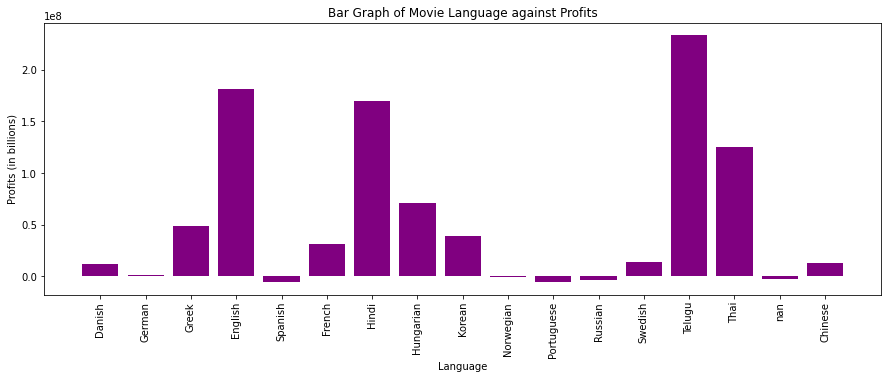

In [58]:
# IMDB Language mapping

language_mapping = {'en': 'English', 'es': 'Spanish', 'fr': 'French', 'de': 'German', 'it': 'Italian', 
                    'pt': 'Portuguese', 'ru': 'Russian', 'zh': 'Chinese', 'ja': 'Japanese', 'ko': 'Korean', 
                    'ar': 'Arabic', 'hi': 'Hindi', 'bn': 'Bengali', 'pa': 'Punjabi', 'id': 'Indonesian', 
                    'vi': 'Vietnamese', 'tr': 'Turkish', 'th': 'Thai', 'ms': 'Malay', 'ml': 'Malayalam', 
                    'ta': 'Tamil', 'kn': 'Kannada', 'gu': 'Gujarati', 'te': 'Telugu', 'mr': 'Marathi', 
                    'pl': 'Polish', 'uk': 'Ukrainian', 'sv': 'Swedish', 'no': 'Norwegian', 'da': 'Danish', 
                    'fi': 'Finnish', 'cs': 'Czech', 'hu': 'Hungarian', 'ro': 'Romanian', 'sk': 'Slovak', 
                    'el': 'Greek', 'he': 'Hebrew', 'th': 'Thai', 'tr': 'Turkish', 'sr': 'Serbian', 
                    'hr': 'Croatian', 'bs': 'Bosnian', 'sl': 'Slovenian', 'sq': 'Albanian', 'mk': 'Macedonian', 
                    'bg': 'Bulgarian', 'is': 'Icelandic', 'lv': 'Latvian', 'lt': 'Lithuanian', 'et': 'Estonian', 
                    'eu': 'Basque', 'gl': 'Galician', 'ca': 'Catalan', 'az': 'Azerbaijani', 'hy': 'Armenian', 
                    'ky': 'Kyrgyz', 'uz': 'Uzbek', 'km': 'Khmer', 'lo': 'Lao', 'my': 'Burmese', 'ne': 'Nepali', 
                    'si': 'Sinhalese', 'sw': 'Swahili', 'zu': 'Zulu', 'af': 'Afrikaans', 'xh': 'Xhosa', 
                    'sq': 'Albanian', 'km': 'Khmer'}

lang_prof = all_combined.groupby('original_language')['profits'].mean()
lang_prof.index = lang_prof.index.map(language_mapping)

x_positions = range(len(lang_prof))

fig, ax = plt.subplots(figsize=(15, 5))
bars = ax.bar(x_positions, lang_prof.values, color='purple')
ax.set_xticks(x_positions)
ax.set_xticklabels(lang_prof.index, rotation=90)
ax.set_title('Bar Graph of Movie Language against Profits')
ax.set_xlabel('Language')
ax.set_ylabel('Profits (in billions)')

plt.show()




Plot a graph of region against average profits

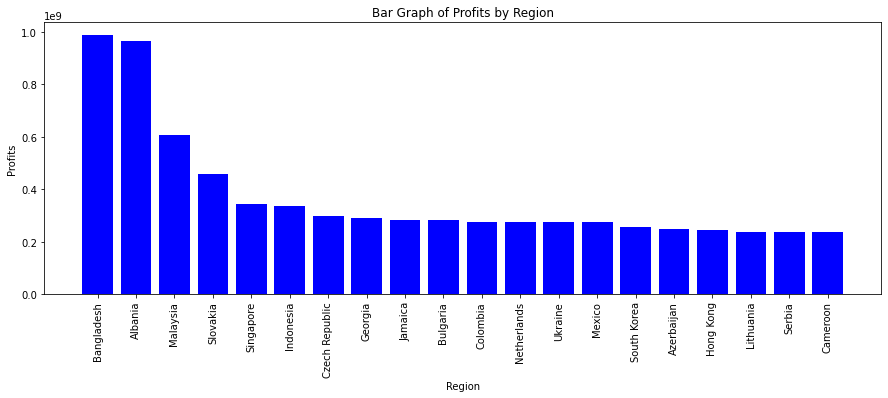

In [268]:
imdb_region_dict = {
    'US': 'United States', 'CA': 'Canada', 'GB': 'United Kingdom', 'AU': 'Australia', 'IN': 'India',
    'DE': 'Germany', 'FR': 'France', 'IT': 'Italy', 'ES': 'Spain', 'MX': 'Mexico', 'BR': 'Brazil',
    'JP': 'Japan', 'CN': 'China', 'KR': 'South Korea', 'RU': 'Russia', 'PL': 'Poland', 'ZA': 'South Africa',
    'AR': 'Argentina', 'NG': 'Nigeria', 'NL': 'Netherlands', 'SE': 'Sweden', 'DK': 'Denmark', 'NO': 'Norway',
    'FI': 'Finland', 'BE': 'Belgium', 'AT': 'Austria', 'CH': 'Switzerland', 'PT': 'Portugal', 'GR': 'Greece',
    'TR': 'Turkey', 'EG': 'Egypt', 'SG': 'Singapore', 'MY': 'Malaysia', 'ID': 'Indonesia', 'PH': 'Philippines',
    'TH': 'Thailand', 'VN': 'Vietnam', 'KW': 'Kuwait', 'SA': 'Saudi Arabia', 'AE': 'United Arab Emirates',
    'QA': 'Qatar', 'HK': 'Hong Kong', 'TW': 'Taiwan', 'IS': 'Iceland', 'LU': 'Luxembourg', 'IE': 'Ireland',
    'PL': 'Poland', 'HR': 'Croatia', 'RS': 'Serbia', 'UA': 'Ukraine', 'RO': 'Romania', 'BG': 'Bulgaria',
    'HR': 'Croatia', 'SK': 'Slovakia', 'SI': 'Slovenia', 'CZ': 'Czech Republic', 'HU': 'Hungary', 'EE': 'Estonia',
    'LV': 'Latvia', 'LT': 'Lithuania', 'UA': 'Ukraine', 'BY': 'Belarus', 'MD': 'Moldova', 'AM': 'Armenia',
    'GE': 'Georgia', 'AZ': 'Azerbaijan', 'KG': 'Kyrgyzstan', 'UZ': 'Uzbekistan', 'KZ': 'Kazakhstan', 'TJ': 'Tajikistan',
    'TM': 'Turkmenistan', 'MN': 'Mongolia', 'LA': 'Laos', 'KH': 'Cambodia', 'NP': 'Nepal', 'BT': 'Bhutan',
    'PK': 'Pakistan', 'AF': 'Afghanistan', 'LK': 'Sri Lanka', 'MM': 'Myanmar', 'BD': 'Bangladesh', 'KP': 'North Korea',
    'AL': 'Albania', 'JM': 'Jamaica', 'CO': 'Colombia', 'CM': 'Cameroon'
}


all_combined['region'] = all_combined['region'].astype(str)
reg_prof = all_combined.groupby('region')['profits'].mean().sort_values(ascending=False).head(20)
reg_prof.index = reg_prof.index.map(lambda x: imdb_region_dict.get(x, str(x)))
fig, ax = plt.subplots(figsize=(15, 5))
ax.bar(reg_prof.index, reg_prof.values, color='blue')
ax.set_title('Bar Graph of Profits by Region')
ax.set_xlabel('Region')
ax.set_ylabel('Profits')
plt.xticks(rotation=90)
plt.show()

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

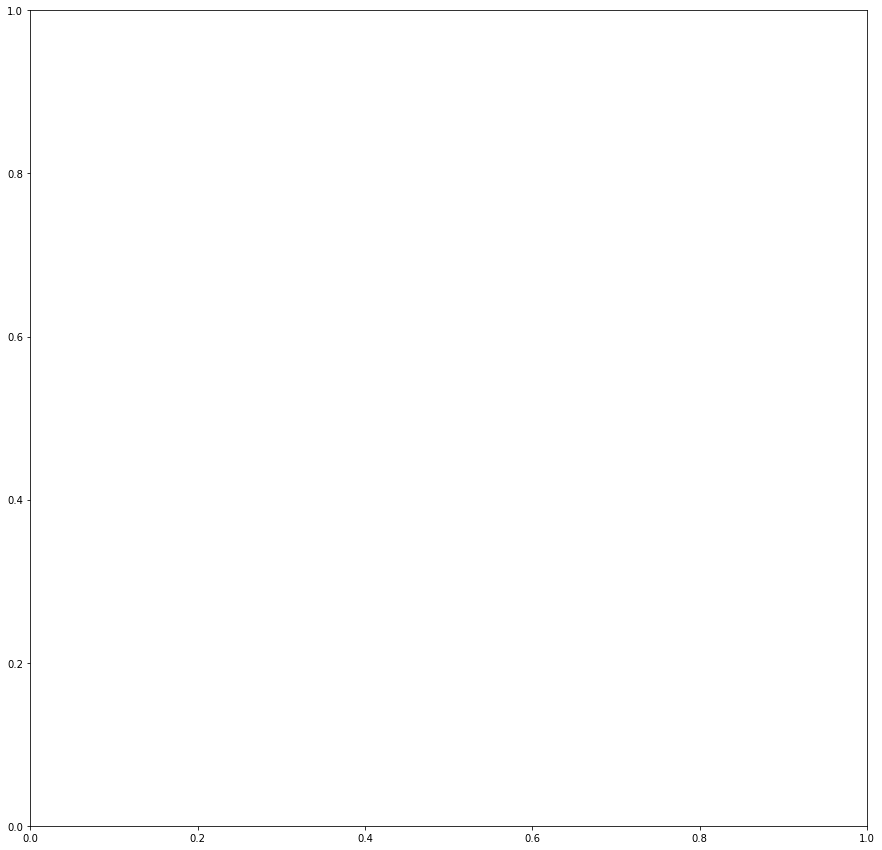